# Reproduce the Krumsiek 2011 model

>Krumsiek J, Marr C, Schroeder T, Theis FJ. Hierarchical differentiation of myeloid progenitors is encoded in the transcription factor network. PLoS One. 2011;6(8):e22649. doi: 10.1371/journal.pone.0022649. Epub 2011 Aug 10. PMID: 21853041; PMCID: PMC3154193.

**Goal:**
   
To provide a systems view on the interactions of core transcription factors for understanding myeloid differentiation, specifically from common myeloid progenitors to megakaryocytes, erythrocytes, granulocytes and monocytes.

**Knowledge source:**
  
Literature review

**Representation:**
  
Boolean network comprises 11 players and 28 interactions.
![Figure 1](Figure1.jpg)  
  
**Tools:**
  
They generated a qualitative interaction model of myeloid differentiation by investigating potential regulatory interactions proposed by the [Bibliosphere text-mining tool](https://pubmed.ncbi.nlm.nih.gov/16212776/).

**in silico validation:**
  
1. In order to assess whether the attractors indeed correspond to the respective cellular fates, they compared the Boolean states with mRNA expression data from two independent microarray experiments(http://www.ebi.ac.uk/microarray-as/ae/).
2. In silico knockout experiments results are compared with literature evidence.


In [1]:
import numpy as np
import pandas as pd
import biolqm
import ginsim
from rpy2.robjects.packages import importr
from rpy2.robjects import IntVector
from rpy2.robjects.vectors import ListVector
from rpy2 import robjects
from rpy2.robjects import conversion
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri
boolnet = importr("BoolNet")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

model_name = "Krumsiek2011"
txt_file = "../../Models" + model_name + ".txt"
sbml_file = "../../Models" + model_name + ".sbml"

This notebook has been executed using the docker image `colomoto/colomoto-docker:2024-03-01`

# Model construction

![Rules](Rules.png)  
Based on the network description in Table 1, , logical functions of the model are summerized into a text file.  
Then standardized gene names are looked up on HGNC and updated.

In [2]:
# Load the network in text file
net = boolnet.loadNetwork(txt_file)

# Export to SBML
boolnet.toSBML(net, sbml_file)
print(boolnet.loadSBML(sbml_file))

Boolean network with 13 genes

Involved genes:
GATA2 GATA1 ZFPM1 KLF1 FLI1 TAL1 CEBPA SPI1 JUN EGR1 EGR2 NAB1 GFI1

Transition functions:
GATA2 = (GATA2 & !(GATA1 & ZFPM1) & !SPI1)
GATA1 = ((GATA1 | GATA2 | FLI1) & !SPI1)
ZFPM1 = GATA1
KLF1 = (GATA1 & !FLI1)
FLI1 = (GATA1 & !KLF1)
TAL1 = (GATA1 & !SPI1)
CEBPA = (CEBPA & !(GATA1 & ZFPM1 & TAL1))
SPI1 = ((CEBPA | SPI1) & !(GATA1 | GATA2))
JUN = (SPI1 & !GFI1)
EGR1 = ((SPI1 & JUN) & !GFI1)
EGR2 = ((SPI1 & JUN) & !GFI1)
NAB1 = ((SPI1 & JUN) & !GFI1)
GFI1 = (CEBPA & !(EGR1 | EGR2 | NAB1))



In [3]:
# Visualize
lqm = biolqm.load(sbml_file)
lrg = biolqm.to_ginsim(lqm)
ginsim.show(lrg)

# Stable states analysis

>  In the following, we focus on the dynamics initiated by an early, unstable undifferentiated state, where only GATA-2, C/EBPA, and PU.1 are active. The subgraph of all nodes downstream of this early state comprises 232 nodes and 789 links (see Figure 3A) and has a number of salient properties: (i) four of the five non-trivial attractors of the system (denoted as s1 to s4 in Figure 3A) can be reached from the early state, (ii) the graph is acyclic, forcing the system to move from the early state towards one of the attractors, and (iii) it exhibits a hierarchical partitioning into non-overlapping subparts.

    
Results in the paper:    
   
![Figure 3](Figure3.jpg)  

In [4]:
attr = boolnet.getAttractors(net, type = "asynchronous")
print(attr)

Attractor 1 is a simple attractor consisting of 1 state(s):

 |--<------------|
 V               |
 0000001111110   |
 V               |
 |-->------------|


Genes are encoded in the following order: GATA2 GATA1 ZFPM1 KLF1 FLI1 TAL1 CEBPA SPI1 JUN EGR1 EGR2 NAB1 GFI1

Attractor 2 is a simple attractor consisting of 1 state(s):

 |--<------------|
 V               |
 0000000000000   |
 V               |
 |-->------------|


Genes are encoded in the following order: GATA2 GATA1 ZFPM1 KLF1 FLI1 TAL1 CEBPA SPI1 JUN EGR1 EGR2 NAB1 GFI1

Attractor 3 is a simple attractor consisting of 1 state(s):

 |--<------------|
 V               |
 0000000111110   |
 V               |
 |-->------------|


Genes are encoded in the following order: GATA2 GATA1 ZFPM1 KLF1 FLI1 TAL1 CEBPA SPI1 JUN EGR1 EGR2 NAB1 GFI1

Attractor 4 is a simple attractor consisting of 1 state(s):

 |--<------------|
 V               |
 0000001100001   |
 V               |
 |-->------------|


Genes are encoded in the following 

![Figure4](Figure4.png)
>...we also analyzed the remaining states upstream of the early state and the supposedly unphysiological fifth stable attractor (with PU.1, cJun and EgrNab active, see above).
    

Compared with the results from the paper:
- Attractor 1 = s3 Monocyte
- Attractor 2 = s5 the unphysiological one
- Attractor 3 = s4 Granulocyte
- Attractor 4 = s1 Erythrocyte
- Attractor 6 = s2 Megakaryocyte

Genes in attractor 5 are all inactive, which is not considered in the paper.   

## Conclusion
**Results from the Krumsiek et al. 2011 are reproducible.**   

## Export the attractors

In [7]:
attrr = boolnet.plotAttractors(attr)
# Activate the conversion context to use pandas DataFrame
pandas2ri.activate()

# Access the dataframe stored under the key '1'
r_df = attrr.rx2('1')

# Use the local converter context to manage the conversion to a numpy array
with localconverter(robjects.default_converter + pandas2ri.converter):
    np_array = np.array(r_df)

# Extract names from the R dataframe
row_names = list(r_df.rownames)
column_names = list(r_df.colnames)

# Create a pandas DataFrame from the numpy array
df = pd.DataFrame(np_array, index=row_names, columns=column_names)

print(df)

       Attr1.1  Attr2.1  Attr3.1  Attr4.1  Attr5.1  Attr6.1
GATA2        0        0        0        0        0        0
GATA1        0        0        0        0        1        1
ZFPM1        0        0        0        0        1        1
KLF1         0        0        0        0        1        0
FLI1         0        0        0        0        0        1
TAL1         0        0        0        0        1        1
CEBPA        1        0        0        1        0        0
SPI1         1        0        1        1        0        0
JUN          1        0        1        0        0        0
EGR1         1        0        1        0        0        0
EGR2         1        0        1        0        0        0
NAB1         1        0        1        0        0        0
GFI1         0        0        0        1        0        0


In [8]:
df = df.T
df.index = df.index.str.replace('Attr', 'S')
df.to_csv('../../SimulationResults/attr_' + model_name + '.csv')

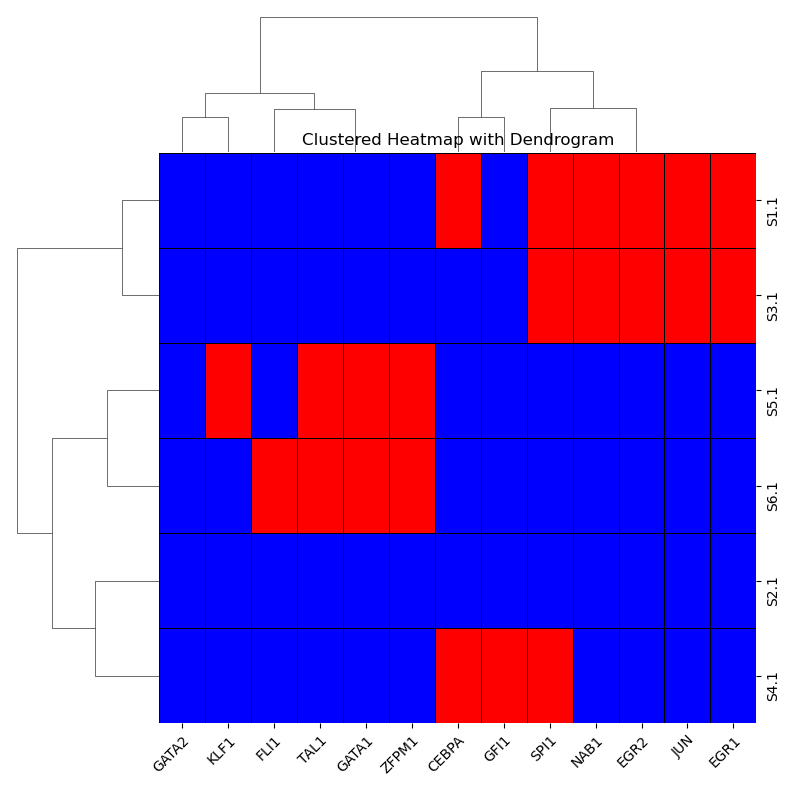

In [14]:
cmap = ListedColormap(['blue', 'red'])
g = sns.clustermap(df, method='ward', metric='euclidean', cmap=cmap, linewidths=0.5, linecolor='black', figsize=(8, 8), cbar=False, col_cluster=True)
g.ax_heatmap.set_title('Clustered Heatmap with Dendrogram')
g.ax_heatmap.tick_params(axis='y', labelsize=10)  # Adjust y-tick label size if needed
g.ax_heatmap.tick_params(axis='x', labelsize=10)  # Adjust x-tick label size if needed, rotate if necessary
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate x-tick labels for better readability
g.cax.set_visible(False)
plt.show()